# Gold Price Prediction.

Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


Import Dataset

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df=pd.read_excel('/content/drive/MyDrive/BIA /Dataset/gld_price_data.xlsx')
#Loading the data.

# EDA

In [6]:
df.head()   # print the first five rows of data.

,Date,SPX,GLD,USO,SLV,EUR/USD
0,2008-02-01,1447.160034,84.860001,78.470001,15.180,1.471692
1,2008-02-02,1447.160034,85.570000,78.370003,15.285,1.474491
2,2008-02-03,1411.630005,85.129997,77.309998,15.167,1.475492
3,2008-02-04,1416.180054,84.769997,75.500000,15.053,1.468299
4,2008-02-05,1390.189941,86.779999,76.059998,15.590,1.557099


In [7]:
df.tail() # print the last five rows of data.

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,2014-05-05,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,2014-05-06,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,2014-05-07,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,2014-05-08,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,2014-05-09,2725.780029,122.543800,14.4058,15.4542,1.182033


In [8]:
df.shape  #shows the total number of rows and column present in data.

(2290, 6)

In [9]:
df.info()  #information about the data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     2290 non-null   datetime64[ns]
 1   SPX      2290 non-null   float64       
 2   GLD      2290 non-null   float64       
 3   USO      2290 non-null   float64       
 4   SLV      2290 non-null   float64       
 5   EUR/USD  2290 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 107.5 KB


In [10]:
df.dtypes #shows datatype of all columns.

Date       datetime64[ns]
SPX               float64
GLD               float64
USO               float64
SLV               float64
EUR/USD           float64
dtype: object

In [11]:
df.isnull().sum()  # shows if there are any missing value in data.

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

There are no Misssing values in data.


In [12]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


# Visualization

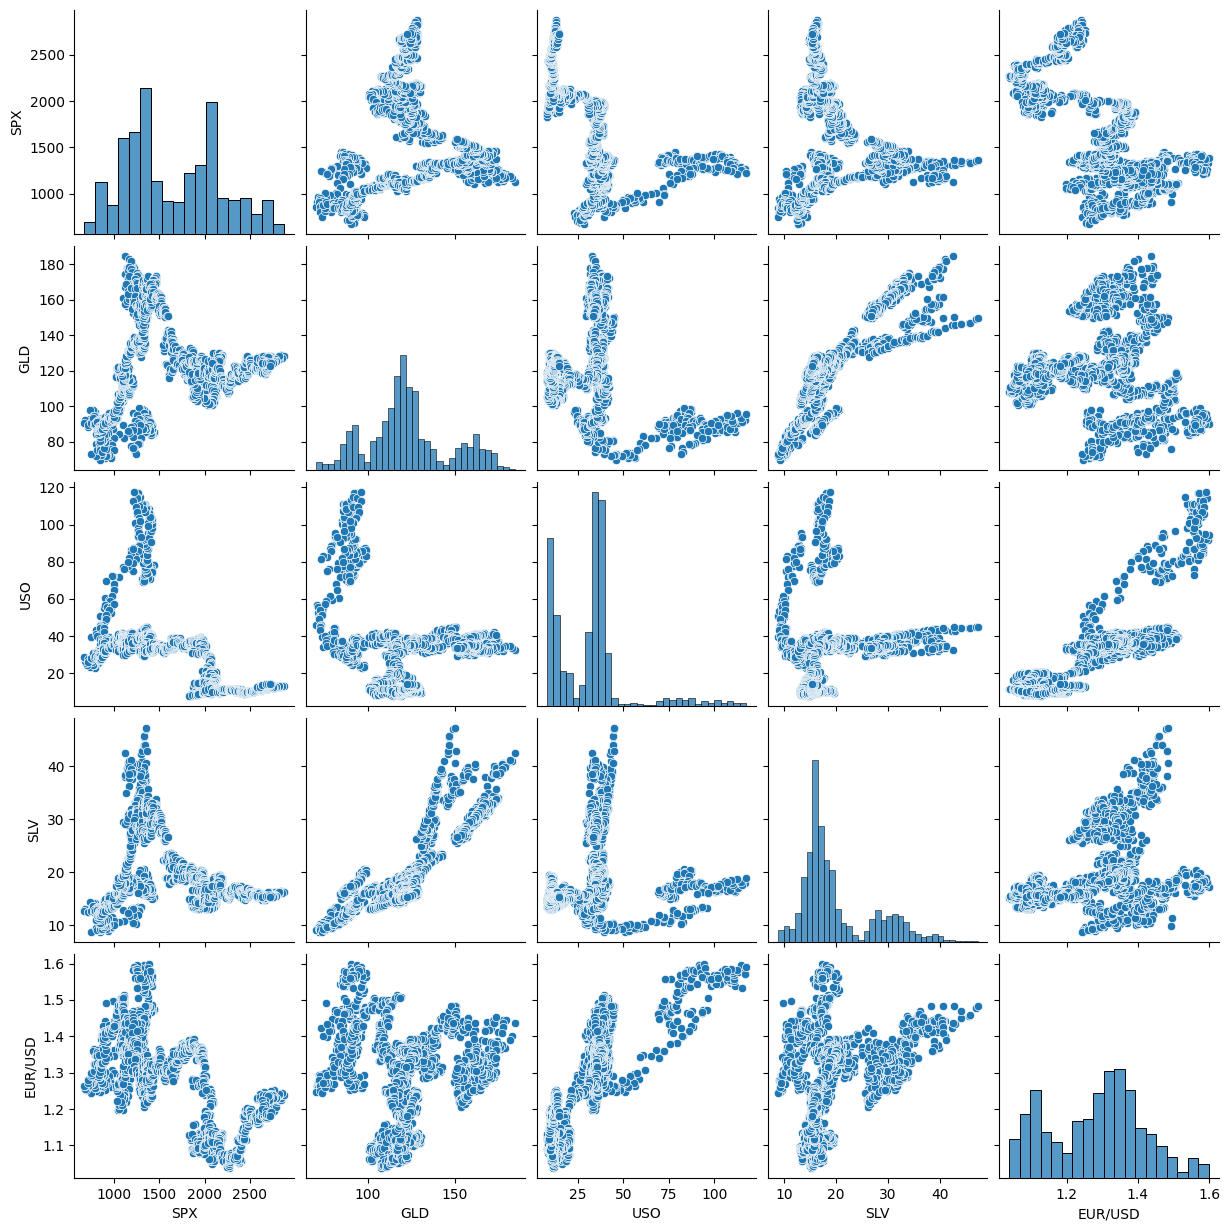

In [13]:
sns.pairplot(df)

Distribution of Continous Numerical Features.

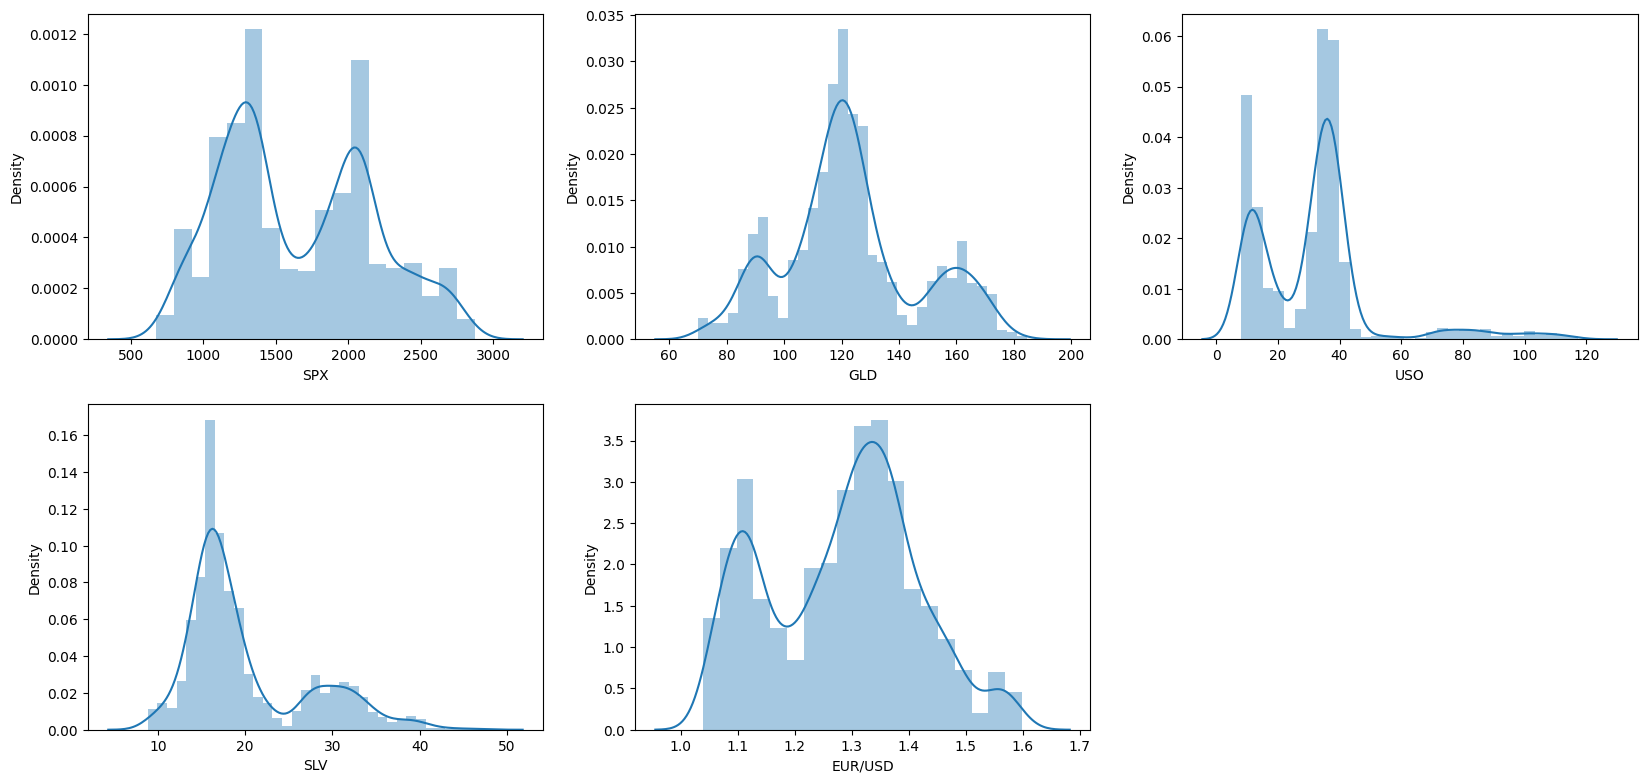

In [14]:
numerical_cols = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_cols in numerical_cols:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(df[numerical_cols])
    plt.xlabel(numerical_cols)
    plotnumber+=1
plt.show()

# USO and SLV have left skewness


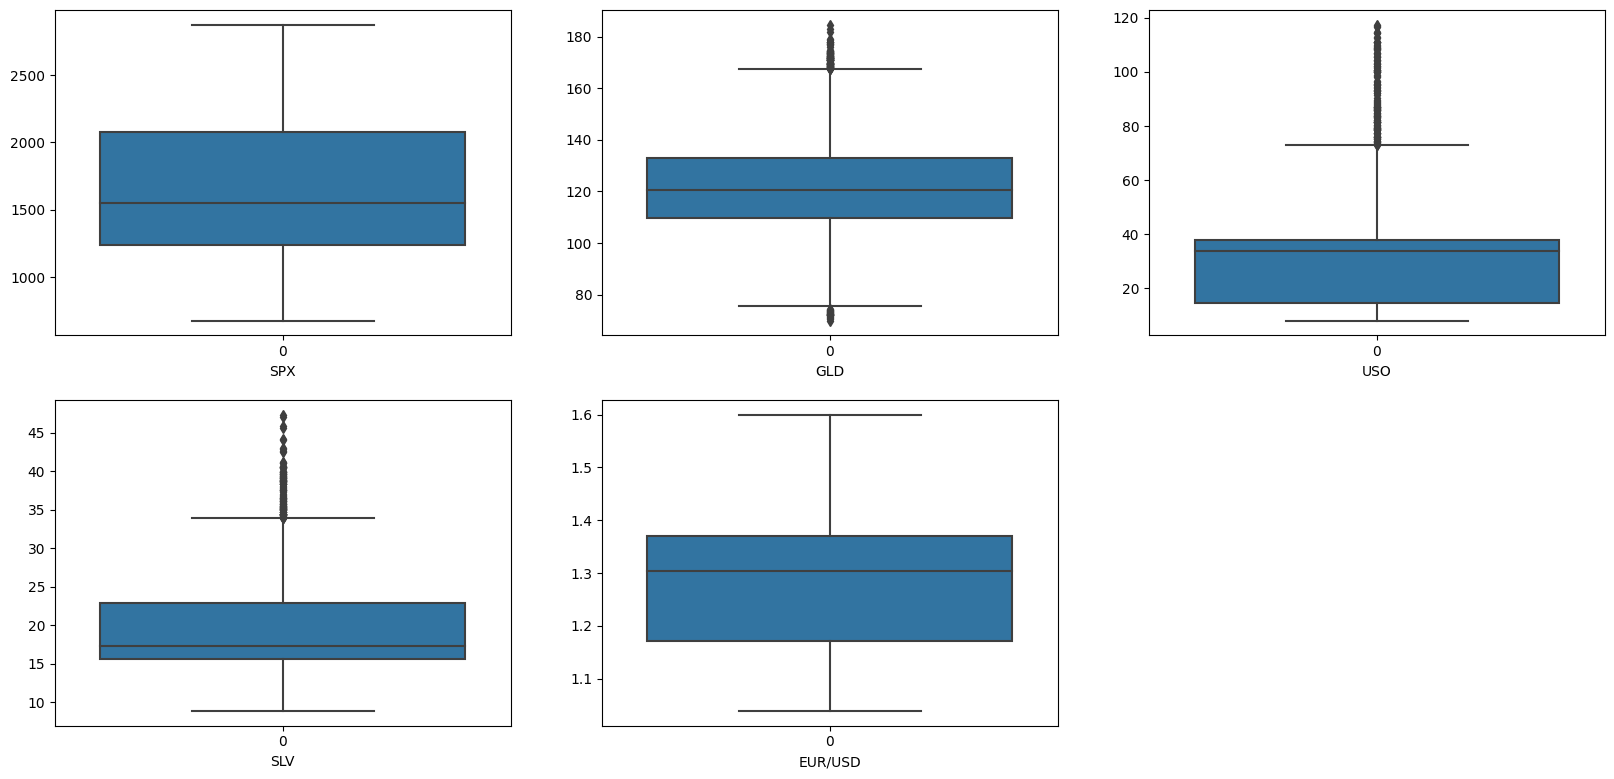

In [15]:
numerical_cols = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_cols in numerical_cols:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df[numerical_cols])
    plt.xlabel(numerical_cols)
    plotnumber+=1

Outlier detection


In [16]:
correlation = df.corr()

<Axes: >

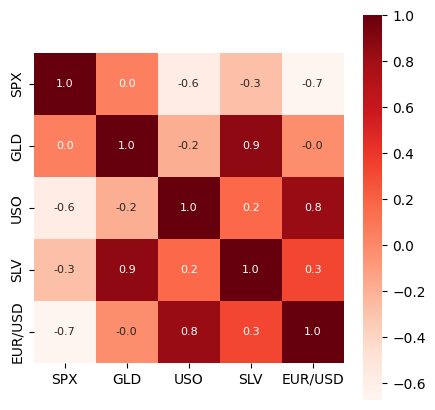

In [17]:
plt.figure(figsize = (5,5))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Reds')

From heatmap We can se SLV and GLD are Positively highly related


# splitting the data

In [18]:
X = df.drop(['Date','GLD'],axis=1)
y= df['GLD']

Traing the data


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=123)

# Model Training




```
# This is formatted as code
```

RandomForest Regressor

In [21]:
from sklearn.ensemble import RandomForestRegressor

In [22]:
rf=RandomForestRegressor()

In [23]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [24]:
y_pred=rf.predict(X_test)

In [25]:
from sklearn import metrics

In [26]:
error = metrics.r2_score(y_test,y_pred)
print("R square",error)

R square 0.9919811143213938


XGBoost Regressor

In [27]:
from xgboost import XGBRegressor


In [28]:
xg=XGBRegressor()

In [29]:
xg.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [30]:
y_pred1=xg.predict(X_test)

In [31]:
xgerror = metrics.r2_score(y_test,y_pred1)
print("R square",xgerror)

R square 0.9883061859011583


Decision Tree Regressor

In [49]:
from sklearn.tree import DecisionTreeRegressor

In [50]:
dtr=DecisionTreeRegressor()

In [51]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [52]:
y_pred2=dtr.predict(X_test)

In [53]:
dtrgerror = metrics.r2_score(y_test,y_pred3)

In [54]:
print("R square",dtrgerror)

R square 0.9869892377214309


# Accuracy Score

In [58]:
accuracy_scores = {
    'RandomForest Regressor': error,
    'XGBoost Regressor': xgerror,
    'DecisionTreeRegressor':dtrgerror,
}

max_length = max(map(len, accuracy_scores.keys()))

for algorithm, score in accuracy_scores.items():
    print(f"{algorithm.ljust(max_length)}: {score:.4f}")

RandomForest Regressor: 0.9920
XGBoost Regressor     : 0.9883
DecisionTreeRegressor : 0.9870
